
# Machine Learning Project
-----------------------------
 Done By :
 - Huda Mhawesh

In [88]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [89]:
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")
#print(data.race.count())
print("We Have "+str(data.shape[0]) + " records and " + str(data.shape[1]) + " features" )
data.iloc[:5, 0:20]

We Have 101766 records and 50 features


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157


In [90]:
data.iloc[:5, 20:40]

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No
3,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No


In [91]:
data.iloc[:5, 40:]

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,No,No,NO
1,No,Up,No,No,No,No,No,Ch,Yes,>30
2,No,No,No,No,No,No,No,No,Yes,NO
3,No,Up,No,No,No,No,No,Ch,Yes,NO
4,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Exploration and Analysis

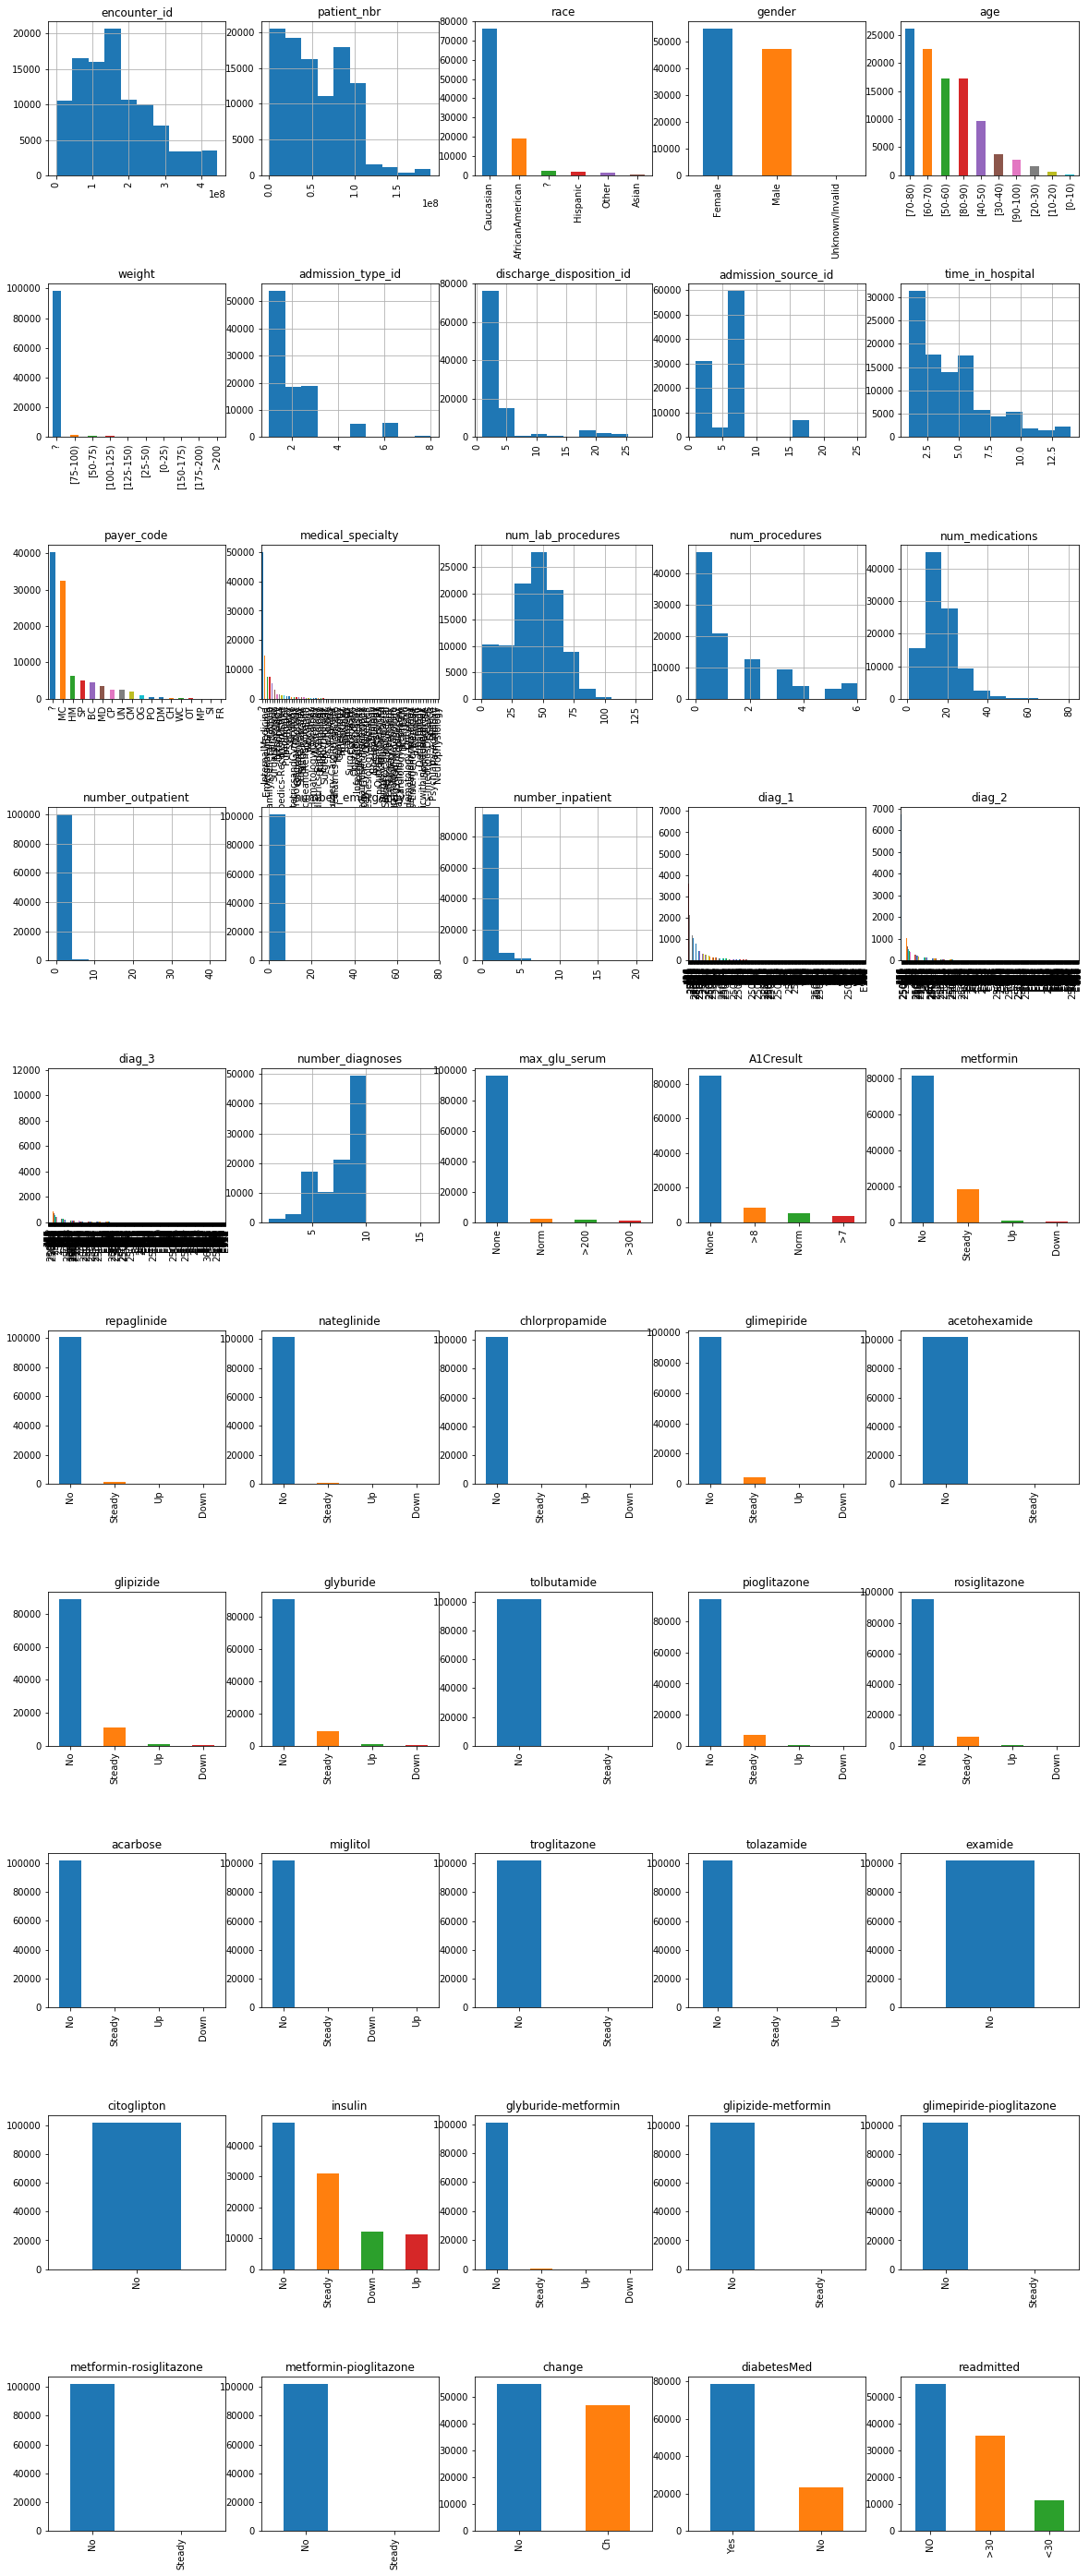

In [92]:
fig = plt.figure(figsize=(20,50))
cols = 5
rows = math.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [94]:
data = data.replace ('?' , np.nan)
data.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [95]:
null_value = data.isnull().sum()
null_value = null_value.to_frame()
null_value = null_value[null_value.values > 0 ]
null_value

,0
race,2273
weight,98569
payer_code,40256
medical_specialty,49949
diag_1,21
diag_2,358
diag_3,1423


In [96]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [97]:
data.groupby(['readmitted','gender'])['gender'].count()


readmitted  gender         
<30         Female              6152
            Male                5205
>30         Female             19518
            Male               16027
NO          Female             29038
            Male               25823
            Unknown/Invalid        3
Name: gender, dtype: int64

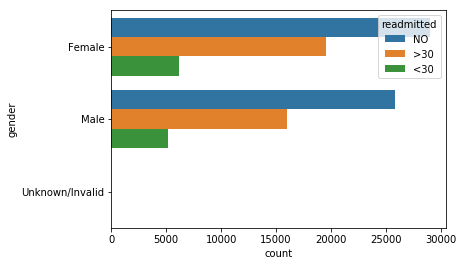

In [98]:
sns.countplot(y='gender', hue='readmitted', data=data,)


In [99]:
data.groupby(['age','readmitted'])['readmitted'].count()

age       readmitted
[0-10)    <30               3
          >30              26
          NO              132
[10-20)   <30              40
          >30             224
          NO              427
[20-30)   <30             236
          >30             510
          NO              911
[30-40)   <30             424
          >30            1187
          NO             2164
[40-50)   <30            1027
          >30            3278
          NO             5380
[50-60)   <30            1668
          >30            5917
          NO             9671
[60-70)   <30            2502
          >30            7897
          NO            12084
[70-80)   <30            3069
          >30            9475
          NO            13524
[80-90)   <30            2078
          >30            6223
          NO             8896
[90-100)  <30             310
          >30             808
          NO             1675
Name: readmitted, dtype: int64

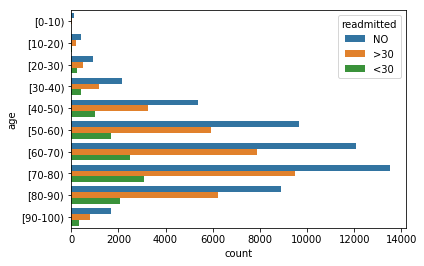

In [100]:
sns.countplot(y='age', hue='readmitted', data=data,)


In [101]:
data['race'] = data['race'].fillna('unknown')
data['payer_code'] = data['payer_code'].fillna('unknown')
data['medical_specialty'] = data['medical_specialty'].fillna('unknown')


# Data Preprocessing

## Delete unnecessary features and records

### useless features
- Weight missing in over 98% records
- Medical Specialty missing  in over 49% records
- drugs named citoglipton and examide have records with the same value

In [102]:
#data = data.drop(['weight','payer_code','medical_specialty'], axis = 1)
data = data.drop(columns=['encounter_id', 'patient_nbr', 'weight' , 'medical_specialty'])

In [103]:
print (data.citoglipton.value_counts())
print (data.examide.value_counts())
data = data.drop(['citoglipton', 'examide'], axis = 1)

No    101766
Name: citoglipton, dtype: int64
No    101766
Name: examide, dtype: int64


In [104]:
print("Number of features is "+str(data.shape[1]))

Number of features is 44


## useless Records
- patients who died during this hospital admission, have zero probability of readmission. So we should remove those records (discharge_disposition = 11)

In [105]:
print(" Num of records = " + str(data.shape[0]))
data['discharge_disposition_id'].value_counts()

 Num of records = 101766


1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [106]:
drop_ind = data[data['discharge_disposition_id'] == 11].index
new_ind = list(set(data.index) - set(drop_ind))
print(len(drop_ind))
data = data.iloc[new_ind]

1642


In [107]:
data.shape

(100124, 44)

-----------------------------------------
### Feature Encoding
----------------------------------------

In [108]:
#Label Encoding
data['readmitted'] = (data.readmitted == '<30').astype('int')
data.groupby('readmitted').size() 
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,unknown,41,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,unknown,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,unknown,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,unknown,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,unknown,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [109]:
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)

In [110]:
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

#### Drugs Encoding

In [111]:
data["insulin"].value_counts()

No        46687
Steady    30332
Down      12012
Up        11093
Name: insulin, dtype: int64

In [112]:
print(data["glipizide-metformin"].value_counts())
print("--------------------------------------------------------")
print(data["metformin-rosiglitazone"].value_counts())
print("--------------------------------------------------------")
print(data["insulin"].value_counts())


No        100111
Steady        13
Name: glipizide-metformin, dtype: int64
--------------------------------------------------------
No        100122
Steady         2
Name: metformin-rosiglitazone, dtype: int64
--------------------------------------------------------
No        46687
Steady    30332
Down      12012
Up        11093
Name: insulin, dtype: int64


In [113]:
drug_Values_encoding = {"No" : int(0) , "Steady" : int(1) , "Down" : int(1) ,
                           "Up" : int(1)}
encoding_columns = {"insulin" : drug_Values_encoding ,
                "metformin" :drug_Values_encoding,
                "repaglinide" :drug_Values_encoding,
                "nateglinide" :drug_Values_encoding,
                "chlorpropamide" :drug_Values_encoding,
                "glimepiride" :drug_Values_encoding,
                "acetohexamide" :drug_Values_encoding,
                "glipizide" :drug_Values_encoding,
                "glyburide" :drug_Values_encoding,
                "tolbutamide" :drug_Values_encoding,
                "pioglitazone" :drug_Values_encoding,
                "rosiglitazone" :drug_Values_encoding,
                "acarbose" :drug_Values_encoding,
                "miglitol" :drug_Values_encoding,
                "troglitazone" :drug_Values_encoding,
                "tolazamide" :drug_Values_encoding,
                "glipizide-metformin" :drug_Values_encoding,
                "glyburide-metformin" :drug_Values_encoding,
                "glimepiride-pioglitazone" :drug_Values_encoding,
                "metformin-rosiglitazone" :drug_Values_encoding,
                "metformin-pioglitazone" :drug_Values_encoding
               }

In [114]:
data.replace(encoding_columns, inplace=True)
print(data["glipizide-metformin"].value_counts())
print("--------------------------------------------------------")
print(data["metformin-rosiglitazone"].value_counts())
print("--------------------------------------------------------")
print(data["insulin"].value_counts())

0    100111
1        13
Name: glipizide-metformin, dtype: int64
--------------------------------------------------------
0    100122
1         2
Name: metformin-rosiglitazone, dtype: int64
--------------------------------------------------------
1    53437
0    46687
Name: insulin, dtype: int64


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100124 entries, 0 to 101765
Data columns (total 44 columns):
race                        100124 non-null object
gender                      100124 non-null object
age                         100124 non-null object
admission_type_id           100124 non-null int64
discharge_disposition_id    100124 non-null int64
admission_source_id         100124 non-null int64
time_in_hospital            100124 non-null int64
payer_code                  100124 non-null object
num_lab_procedures          100124 non-null int64
num_procedures              100124 non-null int64
num_medications             100124 non-null int64
number_outpatient           100124 non-null int64
number_emergency            100124 non-null int64
number_inpatient            100124 non-null int64
diag_1                      100103 non-null object
diag_2                      99766 non-null object
diag_3                      98703 non-null object
number_diagnoses            100124

### Gender & Age & Race Encoding

In [116]:
#age Encoding
age_Values_encoding = {"age" : {"[0-10)" : 0 , "[10-20)" : 1 , "[20-30)" : 2 ,
                       "[30-40)" : 3 , "[40-50)" : 4 , "[50-60)" : 5 ,
                       "[60-70)" : 6 , "[70-80)" : 7 , "[80-90)" : 8 ,
                       "[90-100)" : 9
                      }}
data.replace(age_Values_encoding, inplace=True)
data['age'].value_counts()

7    25566
6    22188
5    17102
8    16708
4     9626
3     3765
9     2669
2     1650
1      690
0      160
Name: age, dtype: int64

In [117]:
print("--------------------RACE-------------------------------")
print(data["race"].value_counts())
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))
data["race"] = data["race"].astype('category')
data["race"] = data["race"].cat.codes
print(data["race"].value_counts())
print(data['race'].isnull().sum())

--------------------RACE-------------------------------
Caucasian          74854
AfricanAmerican    18888
unknown             2239
Hispanic            2024
Other               1486
Asian                633
Name: race, dtype: int64
2    74854
0    18888
5     2239
3     2024
4     1486
1      633
Name: race, dtype: int64
0


In [118]:
#data = pd.read_csv("dataset_diabetes/diabetic_data.csv")
print("------------------GENDER-------------------------------")
data["gender"].replace({"Unknown/Invalid": str(data["gender"].value_counts().index[0])}, inplace=True)
print(data["gender"].value_counts())

data["gender"] = data["gender"].astype('category')
data["gender"] = data["gender"].cat.codes
print(data["gender"].value_counts())
#print(data.race.count())
data.head()

------------------GENDER-------------------------------
Female    53869
Male      46255
Name: gender, dtype: int64
0    53869
1    46255
Name: gender, dtype: int64


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,6,25,1,1,unknown,41,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,1,7,3,unknown,59,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,2,1,1,7,2,unknown,11,5,...,0,0,0,0,0,0,0,0,1,0
3,2,1,3,1,1,7,2,unknown,44,1,...,0,1,0,0,0,0,0,1,1,0
4,2,1,4,1,1,7,1,unknown,51,0,...,0,1,0,0,0,0,0,1,1,0


### Encoding max_glu_serum , A1Cresult

In [119]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -1)

data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -1)


### Diag_1 , Diag_2 , Diag_3 With Scaling
2.1.3.3 Feature Scaling - In the dataset, we found the some numerical features like diag_1, diag_2 and diag_3 contains values with very high range so to make the data more interpretable and model friendly we decided to scale those features from zero to one. We used to min max scalar to perform this task.  2

In [120]:
print(data.diag_1.unique())

['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '626' '295' '196'
 '250.6' '618' '182' '845' '423' '808' '250.4' '722' '250.11' '784' '707'
 '440' '151' '715' '198' '564' '812' '997' '403' '38' '590' '556' '578'
 '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558' '574'
 '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332' '562'
 '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625' '571'
 '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515' '780'
 '250.22' '995' '235' '250.82' '721' '787' '724' '282' '514' 'V55' '281'
 '250.33' '530' '466' '435' '250.12' 'V53' '789' '566' '822' '191' '557'
 '432' '733' '162' '455' '711' '482' '202' '280' '553' '225' '154' '441'
 '250.81' '349' '962' '592' '507' '386' '156' '200' '728' '348' '459'
 '426' '388' '607' '337' '82' '531' '596' '288' '656' '5

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

data['new_diag1'] = data['diag_1']
data.loc[data['diag_1'].str.contains('V'), ['new_diag1']] = 0
data.loc[data['diag_1'].str.contains('E'), ['new_diag1']] = 0

data['new_diag2'] = data['diag_2']
data.loc[data['diag_2'].str.contains('V'), ['new_diag2']] = 0
data.loc[data['diag_2'].str.contains('E'), ['new_diag2']] = 0

data['new_diag3'] = data['diag_3']
data.loc[data['diag_3'].str.contains('V'), ['new_diag3']] = 0
data.loc[data['diag_3'].str.contains('E'), ['new_diag3']] = 0

In [123]:
print(data['diag_3'].value_counts())
print("--------------------------------")
print(data['new_diag3'].value_counts())

250       12916
401        8251
276        5020
428        4463
427        3833
414        3646
496        2535
403        2295
272        1967
585        1955
599        1899
V45        1383
250.02     1348
707        1332
780        1320
285        1190
425        1114
250.6      1076
424        1042
305         919
250.01      900
584         891
682         878
518         768
41          723
493         689
278         680
530         624
786         583
491         557
          ...  
123           1
E894          1
E949          1
381           1
E828          1
951           1
697           1
E922          1
215           1
308           1
890           1
875           1
230           1
186           1
754           1
370           1
E883          1
E864          1
540           1
E826          1
E865          1
674           1
395           1
971           1
669           1
880           1
524           1
122           1
193           1
E912          1
Name: diag_3, Length: 78

In [124]:
print(data['diag_2'].value_counts())
print("--------------------------------")
print(data['new_diag2'].value_counts())

276       7011
428       6531
250       6057
427       4929
401       3726
496       3269
599       3248
403       2761
414       2645
411       2554
250.02    2059
707       1975
585       1837
584       1583
250.01    1517
285       1512
491       1510
780       1464
682       1428
425       1411
486       1304
518       1192
424       1054
413       1040
250.6      891
493        879
305        701
786        642
280        603
998        564
          ... 
E854         1
968          1
974          1
871          1
316          1
E965         1
E813         1
917          1
927          1
944          1
268          1
955          1
520          1
833          1
163          1
580          1
302          1
975          1
702          1
E868         1
615          1
52           1
182          1
350          1
364          1
942          1
256          1
66           1
884          1
347          1
Name: diag_2, Length: 747, dtype: int64
--------------------------------
276       70

In [125]:
print(data['diag_1'].value_counts())
print("--------------------------------")
print(data['new_diag1'].value_counts())

428       6757
414       6555
786       4016
410       3478
486       3413
427       2729
491       2252
715       2147
682       2030
780       2012
434       1958
996       1944
276       1862
250.8     1667
599       1581
38        1522
584       1482
V57       1204
250.6     1178
820       1075
493       1054
577       1048
435       1015
518        986
562        985
574        961
296        895
560        866
250.7      861
250.13     849
          ... 
690          1
318          1
839          1
698          1
391          1
V43          1
381          1
114          1
906          1
216          1
389          1
870          1
V51          1
143          1
366          1
903          1
832          1
605          1
61           1
957          1
133          1
817          1
982          1
148          1
976          1
E909         1
10           1
834          1
V70          1
471          1
Name: diag_1, Length: 715, dtype: int64
--------------------------------
428       67

In [126]:
test_data = data.copy()
data[['new_diag3', 'new_diag2' , 'new_diag1']] = scaler.fit_transform(test_data[['new_diag3', 'new_diag2' , 'new_diag1']])

In [127]:
print(data['new_diag1'].value_counts())
print("--------------------------------")
print(data['new_diag1'].value_counts())


0.428428    6757
0.414414    6555
0.786787    4016
0.410410    3478
0.486486    3413
0.427427    2729
0.491491    2252
0.715716    2147
0.682683    2030
0.780781    2012
0.434434    1958
0.996997    1944
0.276276    1862
0.251051    1667
0.000000    1639
0.599600    1581
0.038038    1522
0.584585    1482
0.250851    1178
0.820821    1075
0.493493    1054
0.577578    1048
0.435435    1015
0.518519     986
0.562563     985
0.574575     961
0.296296     895
0.560561     866
0.250951     861
0.250380     849
            ... 
0.885886       1
0.363363       1
0.412412       1
0.827828       1
0.637638       1
0.216216       1
0.994995       1
0.057057       1
0.325325       1
0.471471       1
0.219219       1
0.832833       1
0.097097       1
0.803804       1
0.838839       1
0.010010       1
0.098098       1
0.365365       1
0.375375       1
0.974975       1
0.640641       1
0.084084       1
0.691692       1
0.299299       1
0.700701       1
0.988989       1
0.982983       1
0.939940      

In [128]:
data = data.drop(columns = ['diag_1','diag_2','diag_3','payer_code'])

--------------------------
## Diag_1 , Diag_2 , Diag_3 With Categorical Encoding
-------------------

---------------------------------
# features Creation
- service_utilization
- Number of medication changes
- Number of medication used

In [129]:
data['N_medication_used'] = 0
for col in encoding_columns.keys():
    data['N_medication_used'] = data['N_medication_used'] + data[col]
data["N_medication_used"].value_counts()

1    46438
0    22846
2    21714
3     7738
4     1325
5       58
6        5
Name: N_medication_used, dtype: int64

In [130]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

In [131]:
data["num_medication_change"]= 0
for col in encoding_columns.keys():
   # print(data[colname])
    data["num_medication_change"] +=  data[col]
data["num_medication_change"].value_counts()

1    46438
0    22846
2    21714
3     7738
4     1325
5       58
6        5
Name: num_medication_change, dtype: int64

In [132]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin-pioglitazone,change,diabetesMed,readmitted,new_diag1,new_diag2,new_diag3,N_medication_used,service_utilization,num_medication_change
0,2,0,0,6,25,1,1,41,0,1,...,0,0,0,0,0.251081,0.276276,0.250250,0,0,0
1,2,0,1,1,1,7,3,59,0,18,...,0,1,1,0,0.276276,0.250260,0.255255,1,0,1
2,0,0,2,1,1,7,2,11,5,13,...,0,0,1,0,0.648649,0.250250,0.000000,1,3,1
3,2,1,3,1,1,7,2,44,1,16,...,0,1,1,0,0.008008,0.250681,0.403403,1,0,1
4,2,1,4,1,1,7,1,51,0,8,...,0,1,1,0,0.197197,0.157157,0.250250,2,0,2


# --------------------------------
--------------------------------
# Predictive Modelling
--------------------------
-------------------------------

# Data Split

In [133]:
one_perc = (len(data[data['readmitted'] == 1]) / len(data[data['readmitted'] == 0]))
print(one_perc)

0.12794169004247075


In [134]:
print(data.shape)
data_clean = data.dropna()
print(data_clean.shape)

(100124, 46)
(100124, 46)


In [135]:
target = data.loc[:,'readmitted']
features = data.drop(columns=['readmitted'])

X = features.values
y = target.values

target_names = data.readmitted.unique()
features_names = data.columns



print("features names: {}".format(list(features_names)))
print("target names: {} ".format(target_names))

features names: ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'new_diag1', 'new_diag2', 'new_diag3', 'N_medication_used', 'service_utilization', 'num_medication_change']
target names: [0 1] 


In [136]:
data = data.dropna()
null_value =data.isnull().sum()
null_value = null_value.to_frame()
null_value = null_value[null_value.values > 0 ]
null_value

,0


In [137]:
# data.info()


In [138]:
from sklearn.model_selection import train_test_split
# Not Balance
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y,test_size=0.5)
print(X_train.shape)
print(X_test.shape)

(50062, 45)
(50062, 45)


# Data Balancing
conda install -c glemaitre imbalanced-learn

In [139]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 5678
Before OverSampling, counts of label '0': 44384 

After OverSampling, the shape of train_X: (88768, 45)
After OverSampling, the shape of train_y: (88768,) 

After OverSampling, counts of label '1': 44384
After OverSampling, counts of label '0': 44384


In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score

def train_and_test(classifier, X_train, X_test, y_train, y_test,t_p):
    
    model=classifier.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy_train=model.score(X_train,y_train)
    accuracy_test=model.score(X_test, y_test)
    print("accuracy train = "+str(accuracy_train))
    print("accuracy test = "+str(accuracy_test)+'\n')
    
    recall=recall_score(y_test, y_predict)
    precision=precision_score(y_test, y_predict)
    print('recall   : '+str(recall))
    print('precision: '+str(precision))
    
    confusion = confusion_matrix(y_test, y_predict)
    print('confusion  matrix')
    print(confusion)
    print(classification_report(y_test, y_predict, target_names=['not 1', '1']))
    if t_p==True:
        y_scores = model.decision_function(X_test)
        precision, recall, thresholds = precision_recall_curve(y_test, y_scores)  

        closest_zero = np.argmin(np.abs(thresholds))
        closest_zero_p = precision[closest_zero]
        closest_zero_r = recall[closest_zero]

        plt.figure()
        plt.xlim([0.0, 1.01])
        plt.ylim([0.0, 1.01])
        plt.plot(precision, recall, label='Precision-Recall Curve')
        plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
        plt.xlabel('Precision', fontsize=16)
        plt.ylabel('Recall', fontsize=16)
        plt.title('Precision-Recall Curve ', fontsize=16)
        plt.axes().set_aspect('equal')
        plt.show()

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)  


        print('area under roc : ' +str(roc_auc))


        plt.figure()
        plt.xlim([-0.01, 1.00])
        plt.ylim([-0.01, 1.01])
        plt.plot(fpr, tpr, lw=3, label=' ROC curve (area = {:0.2f})'.format(roc_auc))
        plt.xlabel('False Positive Rate', fontsize=16)
        plt.ylabel('True Positive Rate', fontsize=16)
        plt.title('ROC curve ', fontsize=16)
        plt.legend(loc='lower right', fontsize=13)
        plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        plt.axes().set_aspect('equal')
        plt.show()

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100124 entries, 0 to 101765
Data columns (total 46 columns):
race                        100124 non-null int8
gender                      100124 non-null int8
age                         100124 non-null int64
admission_type_id           100124 non-null int64
discharge_disposition_id    100124 non-null int64
admission_source_id         100124 non-null int64
time_in_hospital            100124 non-null int64
num_lab_procedures          100124 non-null int64
num_procedures              100124 non-null int64
num_medications             100124 non-null int64
number_outpatient           100124 non-null int64
number_emergency            100124 non-null int64
number_inpatient            100124 non-null int64
number_diagnoses            100124 non-null int64
max_glu_serum               100124 non-null int64
A1Cresult                   100124 non-null int64
metformin                   100124 non-null int64
repaglinide                 100124 non-nu

### logistic regression 
#### Before Data Balancing

accuracy train = 0.886820342774959
accuracy test = 0.886580640006392

recall   : 0.014967423842225745
precision: 0.5029585798816568
confusion  matrix
[[44299    84]
 [ 5594    85]]
              precision    recall  f1-score   support

       not 1       0.89      1.00      0.94     44383
           1       0.50      0.01      0.03      5679

    accuracy                           0.89     50062
   macro avg       0.70      0.51      0.48     50062
weighted avg       0.84      0.89      0.84     50062



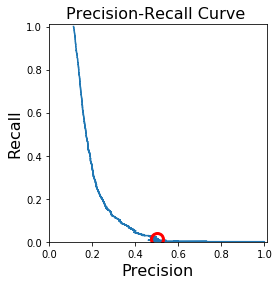

area under roc : 0.6374175213238642


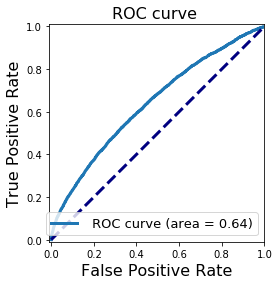

In [142]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty ='l2',C=0.01)
train_and_test(log_reg, X_train, X_test, y_train, y_test,True)

#### After Data Balancing

accuracy train = 0.6071444664744052
accuracy test = 0.6421437417602174

recall   : 0.5444620531783765
precision: 0.16786102062975028
confusion  matrix
[[29055 15328]
 [ 2587  3092]]
              precision    recall  f1-score   support

       not 1       0.92      0.65      0.76     44383
           1       0.17      0.54      0.26      5679

    accuracy                           0.64     50062
   macro avg       0.54      0.60      0.51     50062
weighted avg       0.83      0.64      0.71     50062



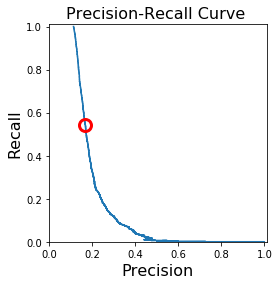

area under roc : 0.6395536361507899


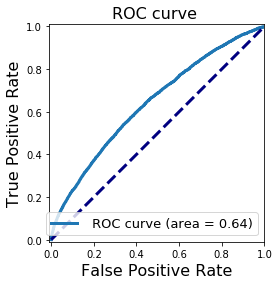

In [143]:
train_and_test(log_reg, X_train_res, X_test, y_train_res, y_test,True)

Feature Importance in logistic regression

In [144]:
# lr=log_reg.fit(X_train_res, y_train_res)
# feature_importances = pd.DataFrame(lr.coef_[0], columns=['importance']).sort_values('importance',
#                                                                         ascending=False)

In [145]:
# num = 50
# ylocs = np.arange(num)
# # get the feature importance for top num and sort in reverse order
# values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
# feature_labels = list(feature_importances.iloc[:num].index)[::-1]

# plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
# plt.barh(ylocs, values_to_plot, align = 'center')
# plt.ylabel('Features')
# plt.xlabel('Importance Score')
# plt.title('Positive Feature  - Logistic Regression')
# plt.yticks(ylocs, feature_labels)
# plt.show()

### single layer perceptron 
#### After Data Balancing


accuracy train = 0.5006083273251623
accuracy test = 0.1148775518357237

recall   : 0.9996478253213594
precision: 0.11357180010402913
confusion  matrix
[[   74 44309]
 [    2  5677]]
              precision    recall  f1-score   support

       not 1       0.97      0.00      0.00     44383
           1       0.11      1.00      0.20      5679

    accuracy                           0.11     50062
   macro avg       0.54      0.50      0.10     50062
weighted avg       0.88      0.11      0.03     50062



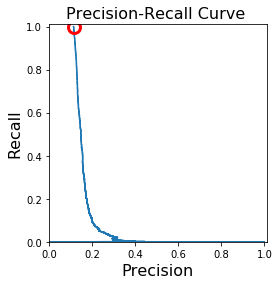

area under roc : 0.5911052616613308


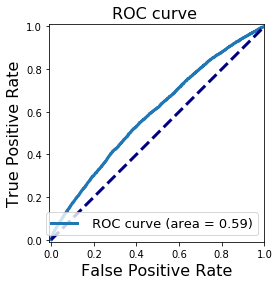

In [146]:
# tol :default=1e-3
# the stopping criterion .if it is not None,the iterations will stop when(loss > previous_loss-tol)
from sklearn.linear_model import Perceptron
clf= Perceptron(tol=1e-3,random_state=0)
train_and_test(clf, X_train_res, X_test, y_train_res, y_test,True)

### multilayer perceptron
#### After Data Balancing


In [147]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
# clf=MLPClassifier(solver='lbfgs',alpha=1e-05,hidden_layer_sizes=(5,2),random_state=1)
train_and_test(mlp, X_train_res, X_test, y_train_res, y_test,False)

accuracy train = 0.6410868781542899
accuracy test = 0.5913267548240182

recall   : 0.6090861067089276
precision: 0.1594156143423357
confusion  matrix
[[26144 18239]
 [ 2220  3459]]
              precision    recall  f1-score   support

       not 1       0.92      0.59      0.72     44383
           1       0.16      0.61      0.25      5679

    accuracy                           0.59     50062
   macro avg       0.54      0.60      0.49     50062
weighted avg       0.84      0.59      0.67     50062



### Decision Trees
#### After Data Balancing


In [148]:
from sklearn.tree import DecisionTreeClassifier

#  trained with the default hyperparameters,
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# trained  with  min_samples_leaf=4.
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

print("No restrictions training")
train_and_test(deep_tree_clf1, X_train_res, X_test, y_train_res, y_test,False)
print("\nrestrictions training")
train_and_test(deep_tree_clf2, X_train_res, X_test, y_train_res, y_test,False)


No restrictions training
accuracy train = 1.0
accuracy test = 0.7854060964404139

recall   : 0.18031343546399015
precision: 0.1439820022497188
confusion  matrix
[[38295  6088]
 [ 4655  1024]]
              precision    recall  f1-score   support

       not 1       0.89      0.86      0.88     44383
           1       0.14      0.18      0.16      5679

    accuracy                           0.79     50062
   macro avg       0.52      0.52      0.52     50062
weighted avg       0.81      0.79      0.80     50062


restrictions training
accuracy train = 0.9580592105263158
accuracy test = 0.8248771523311095

recall   : 0.14580031695721077
precision: 0.1745362563237774
confusion  matrix
[[40467  3916]
 [ 4851   828]]
              precision    recall  f1-score   support

       not 1       0.89      0.91      0.90     44383
           1       0.17      0.15      0.16      5679

    accuracy                           0.82     50062
   macro avg       0.53      0.53      0.53     50062
weig

Feature Importance in Decision Trees

45


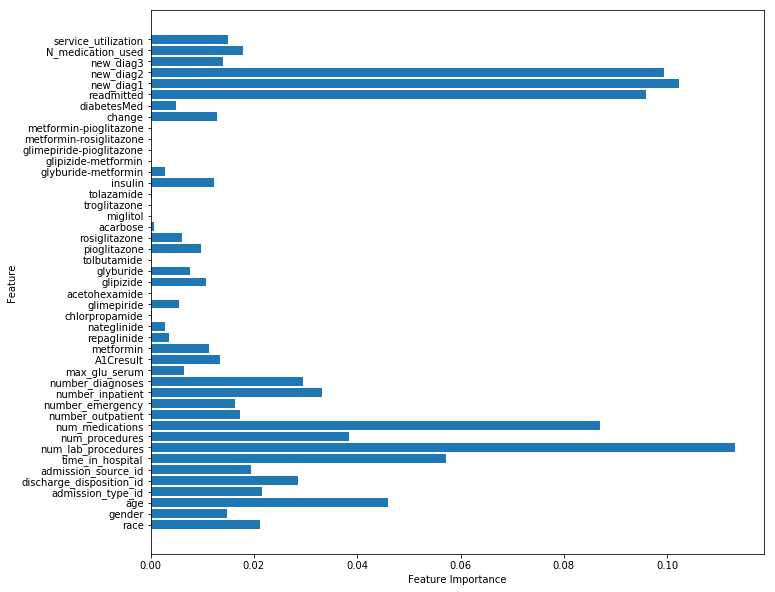

In [174]:
from sklearn.tree import DecisionTreeClassifier

clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X_train, y_train)
print(X.shape[1])
import numpy as np
plt.figure(figsize=(11, 10))
plt.barh(range(X.shape[1]), clf_all.feature_importances_, align='center')
plt.yticks(np.arange(X.shape[1]), features_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### random forests 
#### After Data Balancing


In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state  = 42)
train_and_test(rf, X_train_res, X_test, y_train_res, y_test,False)

accuracy train = 0.9999774693583273
accuracy test = 0.8864208381606807

recall   : 0.014967423842225745
precision: 0.480225988700565
confusion  matrix
[[44291    92]
 [ 5594    85]]
              precision    recall  f1-score   support

       not 1       0.89      1.00      0.94     44383
           1       0.48      0.01      0.03      5679

    accuracy                           0.89     50062
   macro avg       0.68      0.51      0.48     50062
weighted avg       0.84      0.89      0.84     50062



In [151]:
rf1=RandomForestClassifier(max_depth = 6, random_state  = 42)
train_and_test(rf1, X_train_res, X_test, y_train_res, y_test,False)

accuracy train = 0.8632164744051911
accuracy test = 0.8288721984738924

recall   : 0.18700475435816163
precision: 0.21189146049481244
confusion  matrix
[[40433  3950]
 [ 4617  1062]]
              precision    recall  f1-score   support

       not 1       0.90      0.91      0.90     44383
           1       0.21      0.19      0.20      5679

    accuracy                           0.83     50062
   macro avg       0.55      0.55      0.55     50062
weighted avg       0.82      0.83      0.82     50062



### Naive Bayes
#### After Data Balancing


In [158]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
train_and_test(nb, X_train_res, X_test, y_train_res, y_test,False)

accuracy train = 0.5132592826243692
accuracy test = 0.15053333866006152

recall   : 0.9642542701179785
precision: 0.11456306617293249
confusion  matrix
[[ 2060 42323]
 [  203  5476]]
              precision    recall  f1-score   support

       not 1       0.91      0.05      0.09     44383
           1       0.11      0.96      0.20      5679

    accuracy                           0.15     50062
   macro avg       0.51      0.51      0.15     50062
weighted avg       0.82      0.15      0.10     50062



### AdaBoost
#### After Data Balancing


In [159]:
from sklearn.ensemble import AdaBoostClassifier
reg=AdaBoostClassifier(random_state = 0,n_estimators=100)
train_and_test(reg, X_train_res, X_test, y_train_res, y_test,False)

accuracy train = 0.920207732516222
accuracy test = 0.8803283927929367

recall   : 0.050184891706286316
precision: 0.3231292517006803
confusion  matrix
[[43786   597]
 [ 5394   285]]
              precision    recall  f1-score   support

       not 1       0.89      0.99      0.94     44383
           1       0.32      0.05      0.09      5679

    accuracy                           0.88     50062
   macro avg       0.61      0.52      0.51     50062
weighted avg       0.83      0.88      0.84     50062



### XGBoost
#### After Data Balancing


In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
train_and_test(gbc, X_train_res, X_test, y_train_res, y_test,False)

accuracy train = 0.9377253064167268
accuracy test = 0.879569334025808

recall   : 0.041908786758232085
precision: 0.288135593220339
confusion  matrix
[[43795   588]
 [ 5441   238]]
              precision    recall  f1-score   support

       not 1       0.89      0.99      0.94     44383
           1       0.29      0.04      0.07      5679

    accuracy                           0.88     50062
   macro avg       0.59      0.51      0.50     50062
weighted avg       0.82      0.88      0.84     50062



### LightGBM
#### After Data Balancing


In [161]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
train_and_test(model, X_train_res, X_test, y_train_res, y_test,False)

accuracy train = 0.93670016222062
accuracy test = 0.8867204666213895

recall   : 0.01655220989610847
precision: 0.5222222222222223
confusion  matrix
[[44297    86]
 [ 5585    94]]
              precision    recall  f1-score   support

       not 1       0.89      1.00      0.94     44383
           1       0.52      0.02      0.03      5679

    accuracy                           0.89     50062
   macro avg       0.71      0.51      0.49     50062
weighted avg       0.85      0.89      0.84     50062



# Model Selection

##### high-bias model --> under-fit
##### high-variance model -->over-fit

In [162]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
penalty=['l1','l2']
C=[0.01,0.1,1,10,100]
parameters=dict(C=C,penalty=penalty)

grid_clf_acc = GridSearchCV(lr, param_grid = parameters)
model=grid_clf_acc.fit(X_train, y_train)
print('the best parameters is:\n')
print('penalty :'+str(model.best_estimator_.get_params()['penalty']))
print('C       :'+str(model.best_estimator_.get_params()['C']))
print(model.best_score_)

the best parameters is:

penalty :l2
C       :0.01
0.8867004935134464


In [163]:
# # from sklearn.metrics import roc_auc_score
# # from sklearn.datasets import load_digits
# # from sklearn.model_selection import train_test_split


# # dataset = load_digits()
# # X, y = dataset.data, dataset.target == 1
# # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# clf = SVC(kernel='rbf')
# grid_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#                'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# # default metric to optimize over grid parameters: accuracy
# grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
# grid_clf_acc.fit(X_train_res, y_train_res)
# y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

# print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
# print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# # alternative metric to optimize over grid parameters: AUC
# grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
# grid_clf_auc.fit(X_train_res, y_train_res)
# y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

# print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
# print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
# print('Grid best score (AUC): ', grid_clf_auc.best_score_)


In [164]:
# print("Best estimator:\n{}".format(grid_clf_auc.best_estimator_))

# Feature Selection

#### Removing features with low variance

#### Univariate feature selection

In [165]:
from sklearn.feature_selection import SelectPercentile
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train_res, y_train_res)
# transform training set
X_train_selected = select.transform(X_train_res)

print("X_train.shape: {}".format(X_train_res.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (88768, 45)
X_train_selected.shape: (88768, 22)


[False False  True  True  True  True  True  True  True  True False  True
  True  True False  True  True False False False  True False False  True
 False False  True False False False False  True False False False False
 False  True  True  True False  True False  True False]


([], <a list of 0 Text yticklabel objects>)

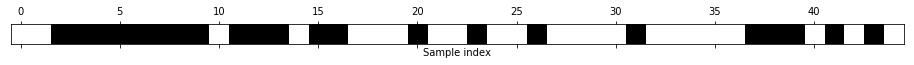

In [166]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
import matplotlib.pyplot as plt
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [167]:
X_test_selected = select.transform(X_test)

lr = LogisticRegression();
train_and_test(lr, X_train_selected, X_test_selected, y_train_res, y_test,False) #Noooooo changeeee -_-

accuracy train = 0.6048914023071377
accuracy test = 0.6398266149974032

recall   : 0.5407642190526502
precision: 0.16605385530442304
confusion  matrix
[[28960 15423]
 [ 2608  3071]]
              precision    recall  f1-score   support

       not 1       0.92      0.65      0.76     44383
           1       0.17      0.54      0.25      5679

    accuracy                           0.64     50062
   macro avg       0.54      0.60      0.51     50062
weighted avg       0.83      0.64      0.70     50062



#### Model-based Feature Selection

In [168]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [169]:
select.fit(X_train_res, y_train_res)
X_train_l1 = select.transform(X_train_res)
print("X_train.shape: {}".format(X_train_res.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (88768, 45)
X_train_l1.shape: (88768, 23)


In [170]:
X_test_l1 = select.transform(X_test)
train_and_test(lr, X_train_l1, X_test_l1, y_train_res, y_test,False) #Noooooo changeeee -_- .......

accuracy train = 0.6026383381398702
accuracy test = 0.6394470856138389

recall   : 0.5449903151963373
precision: 0.1667474812779484
confusion  matrix
[[28917 15466]
 [ 2584  3095]]
              precision    recall  f1-score   support

       not 1       0.92      0.65      0.76     44383
           1       0.17      0.54      0.26      5679

    accuracy                           0.64     50062
   macro avg       0.54      0.60      0.51     50062
weighted avg       0.83      0.64      0.70     50062

